The sole purpose of this application is to predict wheather the image belongs to diseased class or not. In this dataset we have 4 classes diseased leaf , diseased plant , freash leaf and freash plant.In this notebook I will use transfer learning techniques like VGG16 and VGG19 and we'll check how our accuracy got affected with respect to these transfer learning models.

## Table of Content

### Training VGG 16 Model
1. Libraries
2. Training & DataLoader
3. Building the VGG16
4. Summary
5. Training The VGG16
6. Testing
7. Conclusion

### Training VGG19 Model
1. Libraries
2. Training & DataLoader
3. Building the VGG19
4. Summary
5. Training The VGG19
6. Testing
7. Conclusion

#### Final conclusion

### Libraries

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Training & DataLoader


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/cotton/Cotton Disease/train'
valid_path = '/content/drive/MyDrive/cotton/Cotton Disease/test'

### Building the VGG16


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/cotton/Cotton Disease/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)


### Summary


In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Training The VGG16


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cotton/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cotton/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-27-7a9d0aa2e6d3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/4
61/61 [==============================] - 1395s 23s/step - loss: 0.7053 - accuracy: 0.7535 - val_loss: 0.2870 - val_accuracy: 0.8962
Epoch 2/4
61/61 [==============================] - 1347s 22s/step - loss: 0.2407 - accuracy: 0.9077 - val_loss: 0.2377 - val_accuracy: 0.9340
Epoch 3/4
61/61 [==============================] - 1326s 22s/step - loss: 0.1716 - accuracy: 0.9380 - val_loss: 0.2344 - val_accuracy: 0.9245
Epoch 4/4
61/61 [==============================] - 1322s 22s/step - loss: 0.1483 - accuracy: 0.9493 - val_loss: 0.1843 - val_accuracy: 0.9434


### Testing


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/cotton/Cotton Disease/test/fresh cotton leaf/d (7)_iaip.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

1/1 [==============================] - 5s 5s/step


### Conclusion

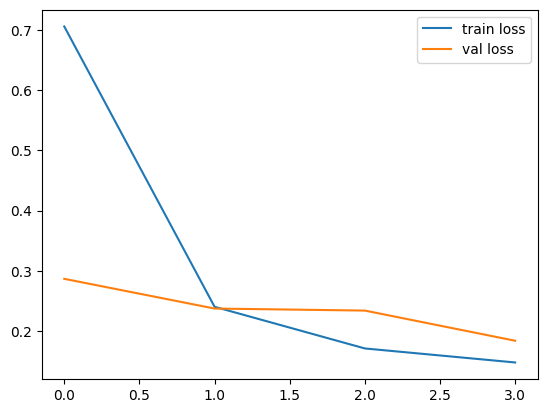

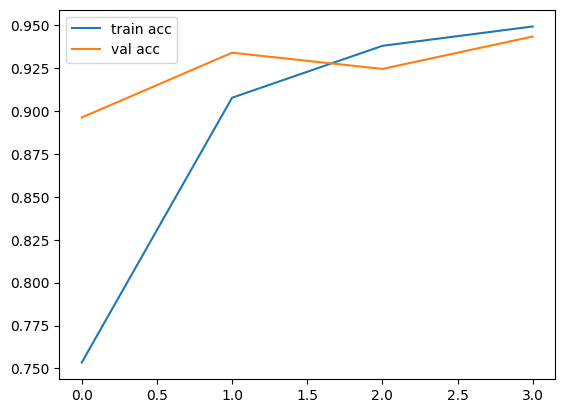

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
result

array([[4.3501254e-06, 4.2141832e-10, 9.9999571e-01, 4.1557406e-09]],
      dtype=float32)

In [ ]:
a= np.argmax(model.predict(test_image),axis=1)

1/1 [==============================] - 1s 561ms/step


In [ ]:
a

array([2])

In [ ]:
# Convert result to list and find the class with highest probability
result = result.ravel().tolist()
max_prob = result[0]
index_of_max = 0

# Loop through the result array to find the max probability and its index
for index, value in enumerate(result):
    if value > max_prob:
        max_prob = value
        index_of_max = index

print(f"Largest element present in given array: {max_prob} And it belongs to {classes[index_of_max]} class.")

Largest element present in given array: 0.9999957084655762 And it belongs to fresh_leaf class.


**Libraries** for **VGG19**

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

### Training & DataLoader


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path1 = '/content/drive/MyDrive/cotton/Cotton Disease/train'
valid_path1 = '/content/drive/MyDrive/cotton/Cotton Disease/test'

### Building the VGG19

In [ ]:
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = Flatten()(vgg19.output)
# Add a fully connected layer with a softmax activation for the output classes
folders = glob('/content/drive/MyDrive/cotton/Cotton Disease/train/*')
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# Create the model object
model_vgg19 = Model(inputs=vgg19.input, outputs=prediction)


### Summary

In [ ]:
# view the structure of the model
model_vgg19.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

### Training The VGG19




In [ ]:
# Compile the model
model_vgg19.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Make sure you provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/cotton/Cotton Disease/train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/cotton/Cotton Disease/test',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# Fit the model
history_vgg19 = model_vgg19.fit(
  training_set,
  validation_data=test_set,
  epochs=4,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/4
61/61 [==============================] - 1667s 27s/step - loss: 0.8409 - accuracy: 0.7022 - val_loss: 0.3106 - val_accuracy: 0.8774
Epoch 2/4
61/61 [==============================] - 1645s 27s/step - loss: 0.2977 - accuracy: 0.8898 - val_loss: 0.2242 - val_accuracy: 0.9057
Epoch 3/4
61/61 [==============================] - 1646s 27s/step - loss: 0.2387 - accuracy: 0.9098 - val_loss: 0.1947 - val_accuracy: 0.9057
Epoch 4/4
61/61 [==============================] - 1638s 27s/step - loss: 0.1904 - accuracy: 0.9339 - val_loss: 0.2139 - val_accuracy: 0.8962


### Testing


In [ ]:
# Predict using VGG19 model
test_image = image.load_img('/content/drive/MyDrive/cotton/Cotton Disease/test/fresh cotton leaf/d (7)_iaip.jpg', target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)
result_vgg19 = model_vgg19.predict(test_image)

1/1 [==============================] - 3s 3s/step


### Conclusion

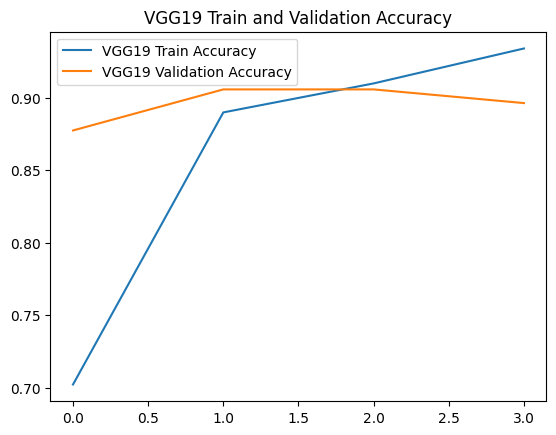

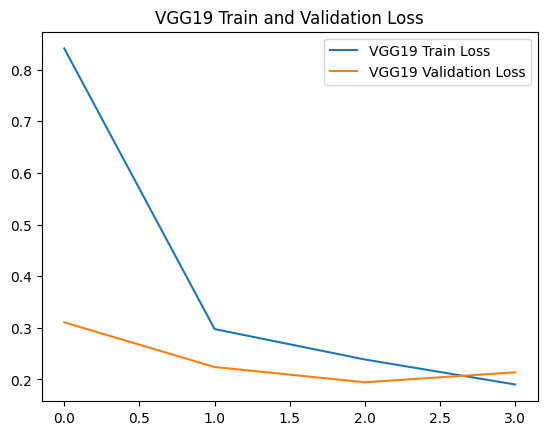

In [ ]:
# Plot VGG19 accuracies and losses
plt.plot(history_vgg19.history['accuracy'], label='VGG19 Train Accuracy')
plt.plot(history_vgg19.history['val_accuracy'], label='VGG19 Validation Accuracy')
plt.title('VGG19 Train and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history_vgg19.history['loss'], label='VGG19 Train Loss')
plt.plot(history_vgg19.history['val_loss'], label='VGG19 Validation Loss')
plt.title('VGG19 Train and Validation Loss')
plt.legend()
plt.show()

In [ ]:
result_vgg19

array([[8.3405335e-05, 9.0200549e-09, 9.9991584e-01, 6.7554714e-07]],
      dtype=float32)

In [ ]:
result_vgg19 = result_vgg19.ravel()

In [ ]:
result_vgg19=result_vgg19.tolist()

In [ ]:
result_vgg19

[8.340533531736583e-05,
 9.020054925201748e-09,
 0.9999158382415771,
 6.755471417818626e-07]

In [ ]:
a1= np.argmax(model_vgg19.predict(test_image),axis=1)

1/1 [==============================] - 1s 1s/step


In [ ]:
a1

array([2])

###  conclusion

In [ ]:
# Convert result to list and find the class with highest probability

max_prob_vgg19 = result_vgg19[0]
index_of_max_vgg19 = 0

# Loop through the result array to find the max probability and its index
for index, value in enumerate(result_vgg19):
    if value > max_prob_vgg19:
        max_prob_vgg19 = value
        index_of_max_vgg19 = index

print(f"[VGG19] Largest element present in given array: {max_prob_vgg19} And it belongs to {classes[index_of_max_vgg19]} class.")

[VGG19] Largest element present in given array: 0.9999158382415771 And it belongs to fresh_leaf class.


### VGG16 VS VGG19

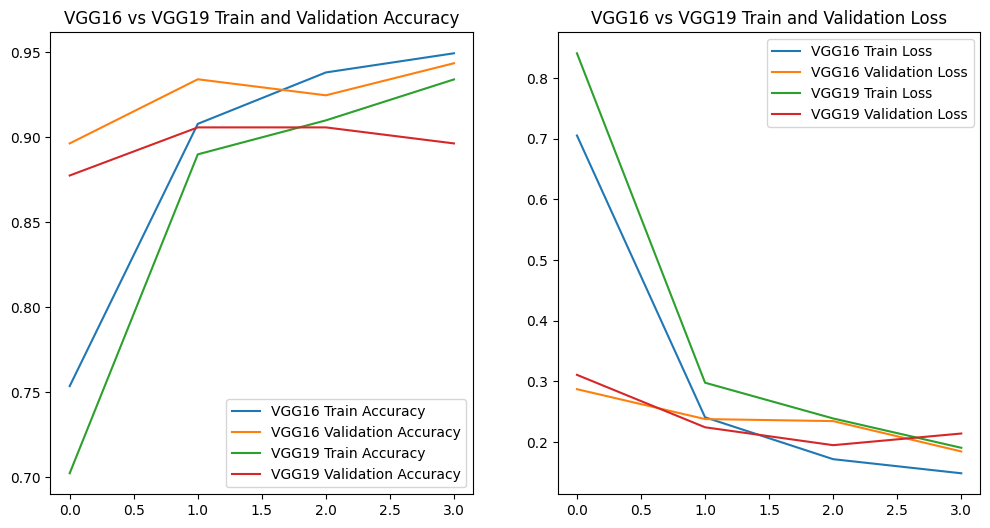

In [ ]:
# Plot the accuracies and losses for VGG16 vs VGG19
plt.figure(figsize=(12, 6))

# Accuracy comparison
plt.subplot(1, 2, 1)
plt.plot(r.history['accuracy'], label='VGG16 Train Accuracy')
plt.plot(r.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.plot(history_vgg19.history['accuracy'], label='VGG19 Train Accuracy')
plt.plot(history_vgg19.history['val_accuracy'], label='VGG19 Validation Accuracy')
plt.title('VGG16 vs VGG19 Train and Validation Accuracy')
plt.legend()

# Loss comparison
plt.subplot(1, 2, 2)
plt.plot(r.history['loss'], label='VGG16 Train Loss')
plt.plot(r.history['val_loss'], label='VGG16 Validation Loss')
plt.plot(history_vgg19.history['loss'], label='VGG19 Train Loss')
plt.plot(history_vgg19.history['val_loss'], label='VGG19 Validation Loss')
plt.title('VGG16 vs VGG19 Train and Validation Loss')
plt.legend()

plt.show()


Our experimentation with the VGG16 and VGG19 models on the cotton disease dataset revealed discernible disparities in their performance. Each model underwent training for four epochs, during which their efficacy was assessed based on training and validation accuracy and loss.

VGG16 demonstrated consistent advancements in both training and validation accuracy. However, there was a slight indication of overfitting as the validation accuracy leveled off marginally lower than the training accuracy. Throughout the training process, the training and validation losses for VGG16 steadily declined, with the validation loss consistently remaining higher than the training loss.

Conversely, VGG19 exhibited similar accuracy improvements but did not perform as well as VGG16 in terms of validation accuracy and loss. Although VGG19 demonstrated a good learning trend, its validation accuracy and loss metrics were generally not as favorable as those of VGG16. This indicates that VGG16 may have more efficient learning and generalization capabilities for this specific dataset.

In summary, while both VGG16 and VGG19 displayed commendable performance, VGG16 showed a slight edge over VGG19 in terms of validation accuracy and loss, suggesting better generalization capabilities. This makes VGG16 a potentially more suitable choice for the cotton disease dataset, balancing performance needs with computational resources more effectively than VGG19.